(512, 512)
255


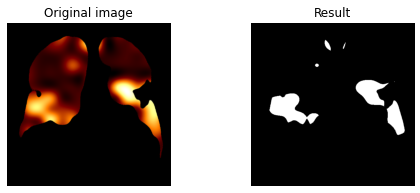

In [1]:
import skimage
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

image = skimage.io.imread('./img_test.png')
thresh = 200
binary = image[:,:,0] > thresh
binary = np.multiply(binary,255)

print(binary.shape)
print(binary.max())
plt.imsave('./result.png',binary, cmap = 'gray')
fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Result')

for a in ax:
    a.axis('off')

plt.show()


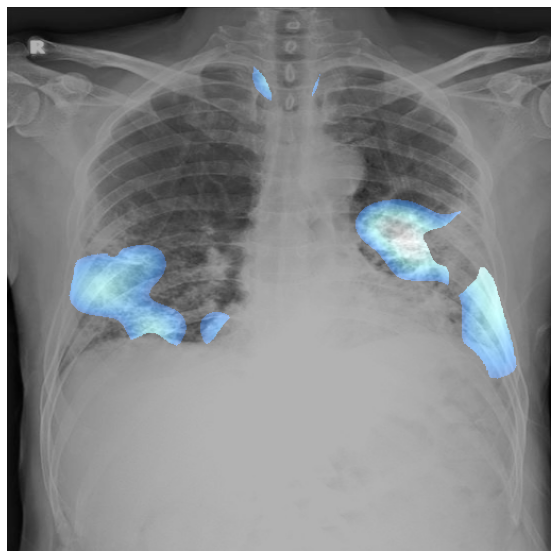

In [14]:
import cv2
import imageio

im_file =cv2.resize(cv2.imread('./img_test.png'),(512,512))

im_bin = cv2.resize(cv2.imread('./result.png'),(512,512))

im_or = cv2.resize(cv2.imread('./cov_xray_01.png'),(512,512))
im_and = cv2.bitwise_and(im_file,im_bin)


im_sum = cv2.addWeighted(im_or,0.7,im_and, 0.4,0)

plt.imshow
fig = plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(im_sum, cmap = 'afmhot')
plt.show()

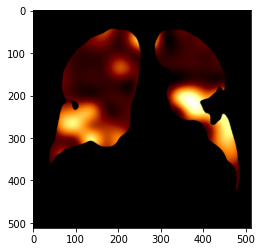

In [20]:
from skimage import data
from skimage import io
from skimage import transform
from matplotlib import pyplot as plt
import cv2

image_grad = skimage.io.imread('./img_test.png')
image_grad = skimage.transform.resize(image_grad,(512,512),anti_aliasing = True)
image = skimage.io.imread('./cov_xray_01.png')

mask = image_grad > 200
mask = np.multiply(mask,255)
mask
mask = cv2.bitwise_and(image_grad,image_grad,mask = )
plt.imshow(mask)

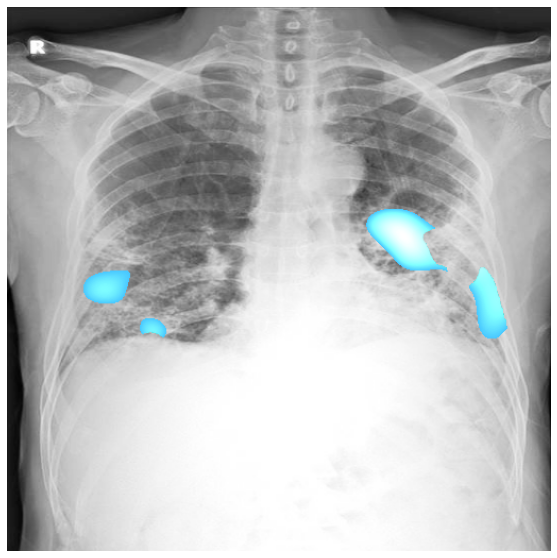

In [3]:
import cv2 as cv
# Load two images
img1 =cv.resize(cv.imread('./cov_xray_01.png'),(512,512))
img2 =cv.resize(cv.imread('./img_test.png'),(512,512))

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 200, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
fig
fig = plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(dst)